# Jupyter notebook to play with the Lorenz system.

$$
\begin {array}{ccl}
\dot{x}& = & \sigma(y-x)\\
\dot{y}& = & x(\rho-z)-y\\
\dot{z}& = & xy-\beta z
\end {array}
$$


In [1]:
import numpy as np 

def Lorenz(r,par):
    sn = par[0]; 
    rho = par[1]; 
    bn = par[2]
    f1=sn*(r[1]-r[0])
    f2=r[0]*(rho-r[2])-r[1]
    f3=r[0]*r[1]-bn*r[2]
    return np.array([f1,f2,f3])

def RK(ro,par,Tf,dt):

    N = int((Tf/dt))
    dtp=100; tp=dtp
    Np = int(N/100)
    T = [k*dtp*dt for k in range(Np)]
    r=ro
    X=[r[0]];Y=[r[1]];Z=[r[2]];
    
    for j in range(N):
        K1=Lorenz(r,par)
        K2=Lorenz(r+0.5*dt*K1,par)
        K3=Lorenz(r+0.5*dt*K2,par)
        K4=Lorenz(r+dt*K3,par)
        r=r+(dt/6.0)*(K1+K2+K3+K4)
        if (j>tp):
            X.append(r[0])
            Y.append(r[1])
            Z.append(r[2])
            tp+=dtp

            
    return T,X,Y,Z

In [2]:
ro=np.array([1,1,0]);
pts=[10,28,2.6]
Tf=50
h=1e-4
t,X1,X2,X3 = RK(ro,pts,Tf,h)

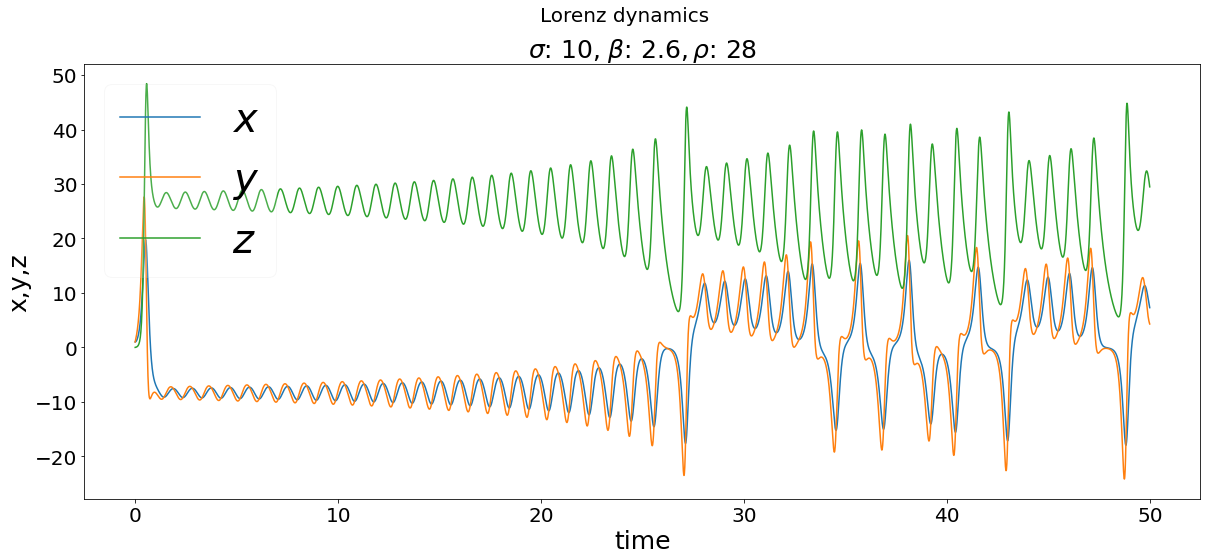

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

fig, axes = plt.subplots(1,1,figsize=(20, 8))

st = fig.suptitle("Lorenz dynamics", fontsize=20)
subt = axes.set_title("$\sigma$: "+str(pts[0])+", $\\beta$: "+str(pts[2])+"$, \\rho$: "+str(pts[1]),fontsize=25)
#subt = axes.set_title("$\sigma$: "+str(sigma)+", $\beta$: "+str(beta)+", $\rho$: "+str(rho)+", fontsize=15)
axes.set_xlabel("time",fontsize=25)
axes.set_ylabel("x,y,z",fontsize=25)
axes.xaxis.set_tick_params(labelsize=20)
axes.yaxis.set_tick_params(labelsize=20)
#axes.set_ylim([0,1.1])
axes.plot(t,X1,"-",label=r"$x$")
axes.plot(t,X2,"-",label=r'$y$')
axes.plot(t,X3,"-",label=r'$z$')
fig.patch.set_alpha(0.5)
# Now add the legend with some customizations.
legend = axes.legend(loc='best', fontsize=40,framealpha=0.15)
#fig.savefig('r.svg',format='svg',dpi=600, bbox_inches='tight')
#fig.savefig('xyzt.png',format='png',dpi=600, bbox_inches='tight')

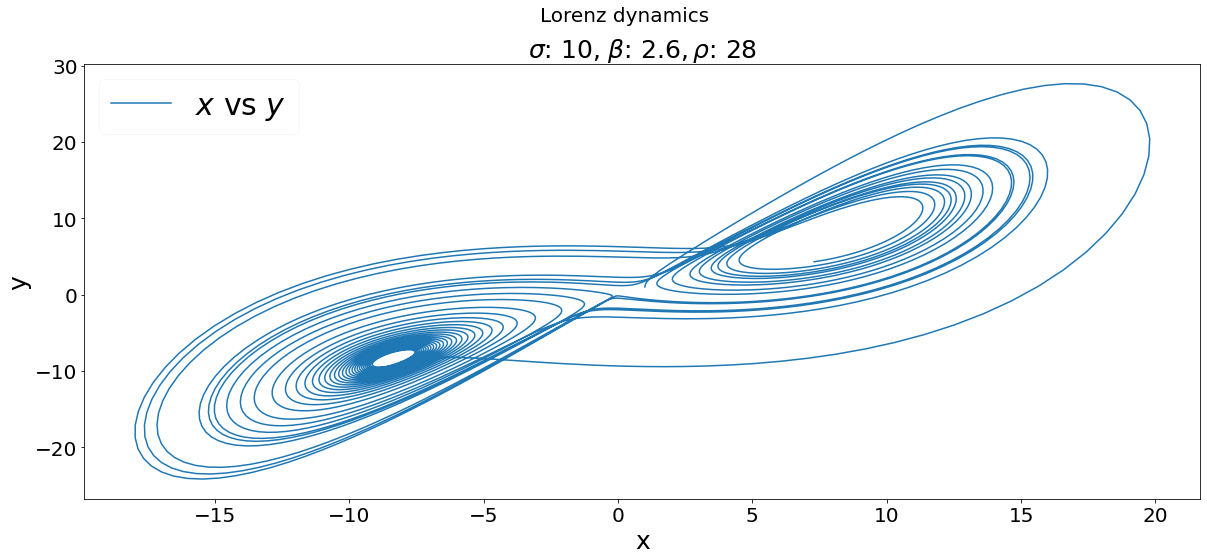

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

fig, axes = plt.subplots(1,1,figsize=(20, 8))

st = fig.suptitle("Lorenz dynamics", fontsize=20)
subt = axes.set_title("$\sigma$: "+str(pts[0])+", $\\beta$: "+str(pts[2])+"$, \\rho$: "+str(pts[1]),fontsize=25)
#subt = axes.set_title("$\sigma$: "+"$\\beta$: "+"$\\rho$: ",fontsize=25)
axes.set_xlabel("x",fontsize=25)
axes.set_ylabel("y",fontsize=25)
axes.xaxis.set_tick_params(labelsize=20)
axes.yaxis.set_tick_params(labelsize=20)
#axes.set_ylim([0,1.1])
axes.plot(X1,X2,"-",label="$x$ vs $y$")
#axes.plot(tplt,yplt,"-",label='$y$')
#axes.plot(tplt,zplt,"-",label='$z$')
fig.patch.set_alpha(0.5)
# Now add the legend with some customizations.
legend = axes.legend(loc='best', fontsize=30,framealpha=0.15)
#fig.savefig('r.svg',format='svg',dpi=600, bbox_inches='tight')
#fig.savefig('xychaos.png',format='png',dpi=600, bbox_inches='tight')

5000 5000


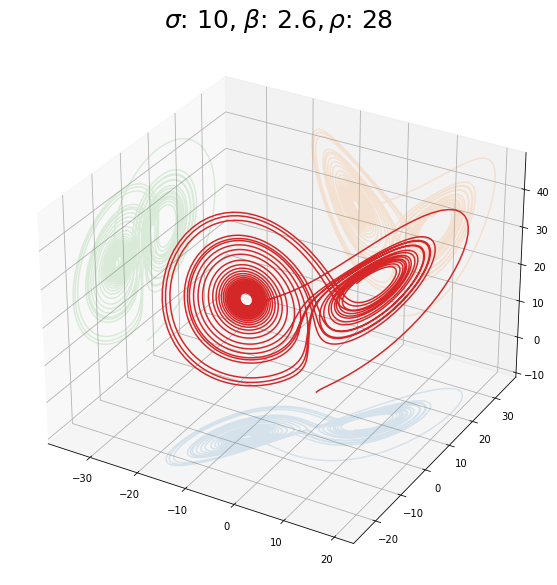

In [5]:
pz=len(t)*[-10.0]
px=len(t)*[-35.0]
py=len(t)*[35.0]

print (len(pz), len(t))

import matplotlib as mpl
#import six
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(20,10)).add_subplot(projection='3d')
#fig.suptitle("Lorenz dynamics", fontsize=25)

plt.title("$\sigma$: "+str(pts[0])+", $\\beta$: "+str(pts[2])+"$, \\rho$: "+str(pts[1]),fontsize=25)
#plt.plot(xplt, yplt, zplt)
plt.plot(X1, X2, pz,alpha=0.15 )
plt.plot(X1, py , X3, alpha=0.15 )
plt.plot(px, X2 , X3,alpha=0.15 )
plt.plot(X1, X2, X3)
#ax.legend()
#fig.savefig('xyzchaos.png',format='png',dpi=600, bbox_inches='tight')

# Periodic Case

In [23]:
Tf=50 #final time

sigma=10.0
beta=8.0/3.0
rho=300.5
pts=[sigma,rho,beta]
ro=np.array([-40.1,-78.1,329])
h=1e-4

t,X1,X2,X3 = RK(ro,pts,Tf,h)


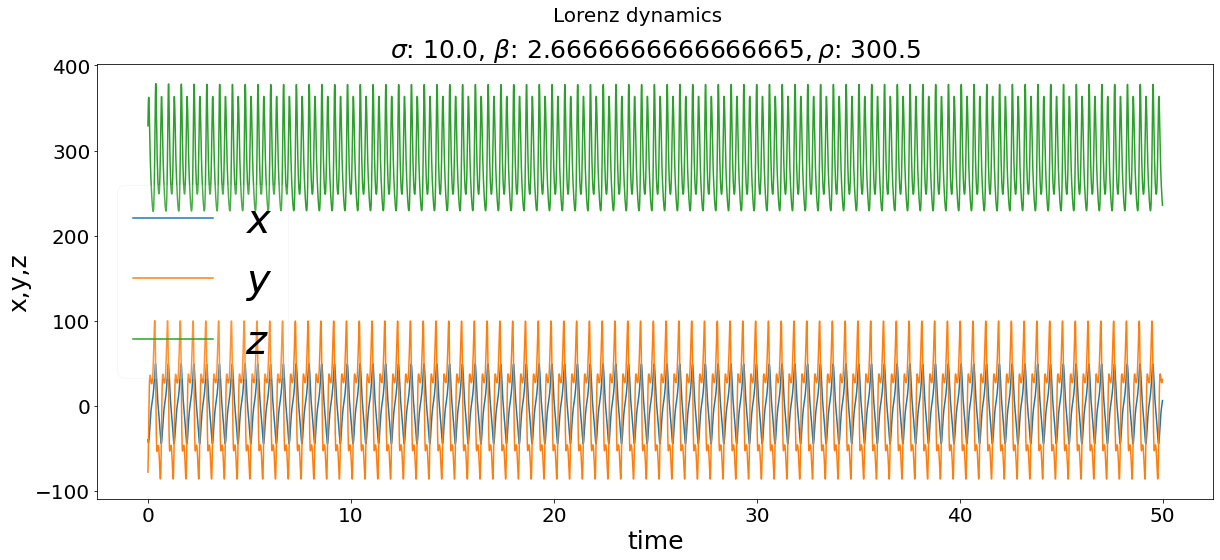

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

fig, axes = plt.subplots(1,1,figsize=(20, 8))

st = fig.suptitle("Lorenz dynamics", fontsize=20)
subt = axes.set_title("$\sigma$: "+str(pts[0])+", $\\beta$: "+str(pts[2])+"$, \\rho$: "+str(pts[1]),fontsize=25)
#subt = axes.set_title("$\sigma$: "+str(sigma)+", $\beta$: "+str(beta)+", $\rho$: "+str(rho)+", fontsize=15)
axes.set_xlabel("time",fontsize=25)
axes.set_ylabel("x,y,z",fontsize=25)
axes.xaxis.set_tick_params(labelsize=20)
axes.yaxis.set_tick_params(labelsize=20)
#axes.set_ylim([0,1.1])
axes.plot(t,X1,"-",label=r"$x$")
axes.plot(t,X2,"-",label=r'$y$')
axes.plot(t,X3,"-",label=r'$z$')
fig.patch.set_alpha(0.5)
# Now add the legend with some customizations.
legend = axes.legend(loc='best', fontsize=40,framealpha=0.15)
#fig.savefig('r.svg',format='svg',dpi=600, bbox_inches='tight')
#fig.savefig('xyzt.png',format='png',dpi=600, bbox_inches='tight')

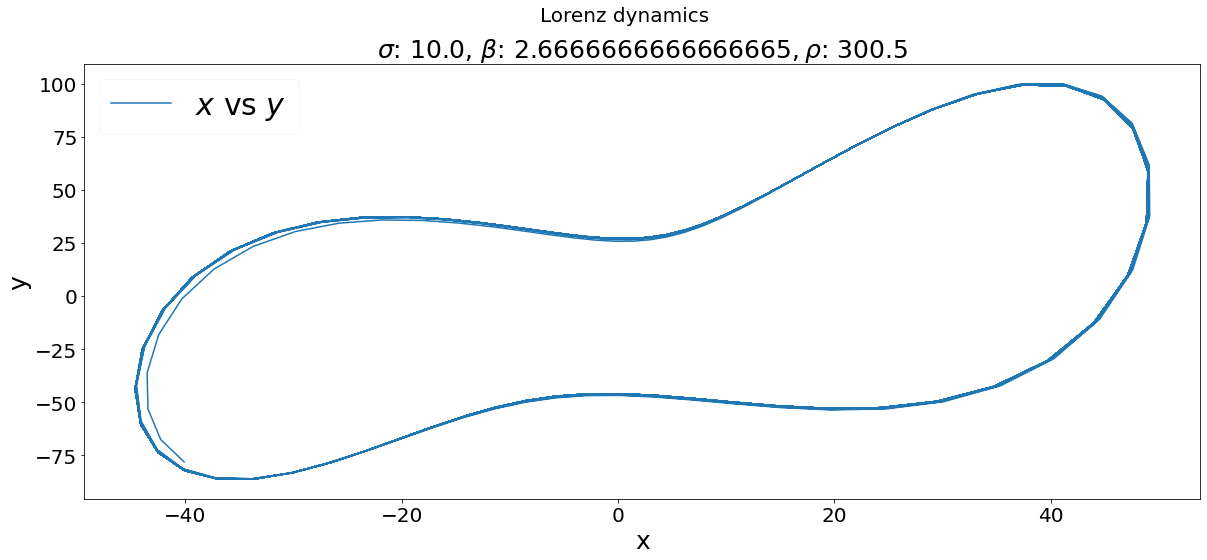

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

fig, axes = plt.subplots(1,1,figsize=(20, 8))

st = fig.suptitle("Lorenz dynamics", fontsize=20)
subt = axes.set_title("$\sigma$: "+str(pts[0])+", $\\beta$: "+str(pts[2])+"$, \\rho$: "+str(pts[1]),fontsize=25)
#subt = axes.set_title("$\sigma$: "+"$\\beta$: "+"$\\rho$: ",fontsize=25)
axes.set_xlabel("x",fontsize=25)
axes.set_ylabel("y",fontsize=25)
axes.xaxis.set_tick_params(labelsize=20)
axes.yaxis.set_tick_params(labelsize=20)
#axes.set_ylim([0,1.1])
axes.plot(X1,X2,"-",label="$x$ vs $y$")
#axes.plot(tplt,yplt,"-",label='$y$')
#axes.plot(tplt,zplt,"-",label='$z$')
fig.patch.set_alpha(0.5)
# Now add the legend with some customizations.
legend = axes.legend(loc='best', fontsize=30,framealpha=0.15)
#fig.savefig('r.svg',format='svg',dpi=600, bbox_inches='tight')
#fig.savefig('xychaos.png',format='png',dpi=600, bbox_inches='tight')

5000 5000


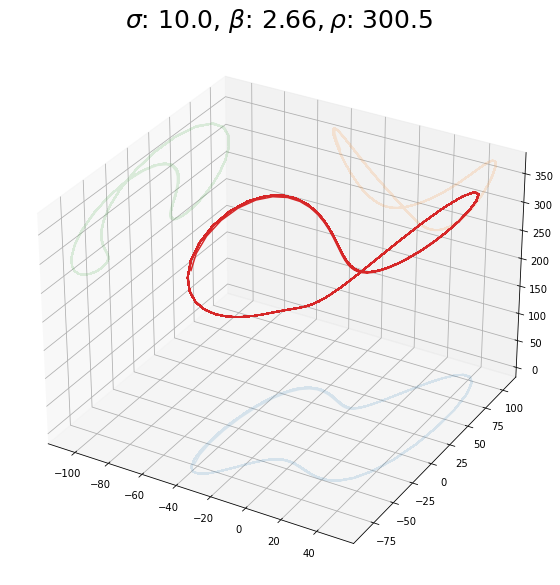

In [26]:
pz=len(t)*[-10.0]
px=len(t)*[-105.0]
py=len(t)*[105.0]

print (len(pz), len(t))

import matplotlib as mpl
#import six
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(20,10)).add_subplot(projection='3d')
#fig.suptitle("Lorenz dynamics", fontsize=25)

plt.title("$\sigma$: "+str(pts[0])+", $\\beta$: "+'{0:.4}'.format(str(pts[2]))+"$, \\rho$: "+str(pts[1]),fontsize=25)
#plt.plot(xplt, yplt, zplt)
plt.plot(X1, X2, pz,alpha=0.15 )
plt.plot(X1, py , X3, alpha=0.15 )
plt.plot(px, X2 , X3,alpha=0.15 )
plt.plot(X1, X2, X3)
#ax.legend()
#fig.savefig('xyzchaos.png',format='png',dpi=600, bbox_inches='tight')